In [1]:
# packages
import numpy as np
import xlrd # to open excel
import math
import time

# Get data

https://www.insee.fr/fr/statistiques?taille=100&debut=0&theme=1&categorie=3&geo=COMPRD-1

Thème Démographie / Evolution et structure de la population / Population selon le sexe et l'âge quinquennal de 1968 à 2017  (onglet COM_2017)


In [3]:
#open xls file
file = xlrd.open_workbook('pop-sexe-age-quinquennal6817.xls',on_demand=True)

name = "COM_2017"
sheet = file.sheet_by_name(name)

#print(sheet.__dict__.keys())

print(sheet.ncols, sheet.nrows) # columns number, rows number

cols_labels = sheet.row(12)
#print(cols_labels)

46 38228


In [4]:
(sheet.cell(12, 0)).value, (sheet.cell(12, 1)).value

('Région \nen géographie courante', 'Département\nen géographie courante')

In [6]:
for col in range(3): # only the 3 first ones, otherwise --> sheet.ncols  #skipping headers of the xlsx
    #print(sheet.cell(rownum, 1)) # e.g Printing all rows value of 3rd column
    print((sheet.cell(12, col)).value)
    print(" ==== ")

Région 
en géographie courante
 ==== 
Département
en géographie courante
 ==== 
Commune
en géographie courante
 ==== 


In [7]:
sheet.col_slice(colx = 5, start_rowx=14, end_rowx=16)

[text:'Abergement-Clémenciat', text:'Abergement-De-Varey']

# Data manipulation

In [8]:
numrow = 10 # 11th row, where we find age incrementation , step = 5 years old
# numrow = 11 --> here, we find sexe labels : 1 for man && 2 for women
dic = {}


# here, we want to separate the gender in the dictionary

#dic["id_comune"] = []
dic["Age"] = []
dic["Men"] = []
dic["Women"] = []
age = []

start_time = time.time()

for col in range(6,sheet.ncols):
    m = []; f = []; 

    #print(sheet.cell(numrow, col).value) 
    age.append(float(sheet.cell(10, col).value)) # do not worry, we remove duplicates at the end
        
    for i in sheet.col_slice(colx = col, start_rowx=14, end_rowx=sheet.nrows-1):
        if sheet.cell(numrow + 1, col).value == 1.0:  # women 
                
            if not i.value: # empty string ''
                m.append(0)
            else:
                m.append(i.value)  
                
        if sheet.cell(numrow + 1, col).value == 2.0:  # woman 
            if not i.value: # empty string ''
                 f.append(0)
            else:
                f.append(i.value)   
                

    # an empty m is created for women set, however, 
    # below, we ignore this empty list already created by boocle for
    # because we want to separate F  and M in the dictionary
                    
                    
    ###  =========================================   ###
    if m: # List is not empty
        dic["Men"].append(m)

    if f: # List is not empty
        dic["Women"].append(f)
    ###   =========================================   ###
    
# age list includes duplicated elements since there is a same age for man and women
###   ==================== remove duplicates elts =====================   ###
dic["Age"] = list(dict.fromkeys(age))

print("--- %s seconds ---" % (time.time() - start_time))        
    

--- 6.550785064697266 seconds ---


In [9]:
len(dic["Age"])

20

In [10]:
dic["Women"][0][:3]

[20.14216916556245, 20.41152263374484, 0]

In [11]:
dic["Men"][0][:3]

[15.07873228599744, 5.10288065843621, 0]

# PLOTS

In [12]:
sum_men = [sum(dic["Men"][i]) for i in np.arange(len(dic["Age"]))]

sum_women = [-sum(dic["Women"][i]) for i in np.arange(len(dic["Age"]))]

In [13]:
# create age labels for the plot
yticklabels = []
for i in dic['Age'][:-1]:
    yticklabels.append(str(int(i)) + "-" + str( int(i)+4))
yticklabels.append(">=95")
yticklabels

['0-4',
 '5-9',
 '10-14',
 '15-19',
 '20-24',
 '25-29',
 '30-34',
 '35-39',
 '40-44',
 '45-49',
 '50-54',
 '55-59',
 '60-64',
 '65-69',
 '70-74',
 '75-79',
 '80-84',
 '85-89',
 '90-94',
 '>=95']

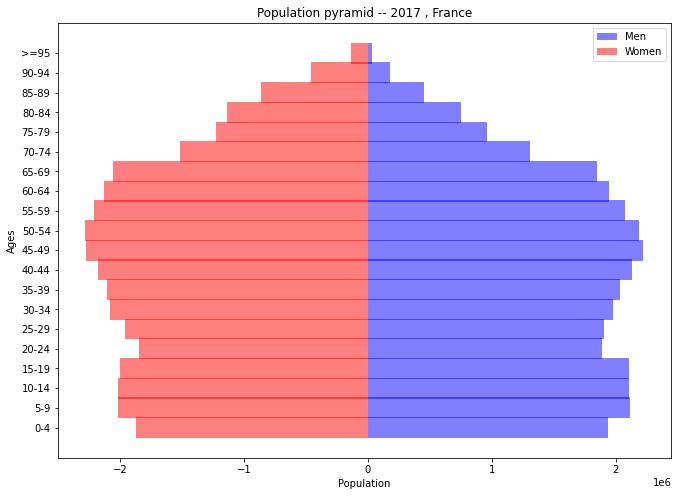

In [14]:
from matplotlib import pyplot as plt
from numpy import arange
fig, ax = plt.subplots(figsize=(11,8))
ValH = ax.barh(dic["Age"], sum_men, 5.3, label="Men",
               color='b', linewidth=0.5, align='center', alpha = 0.5)
ValF = ax.barh(dic["Age"], sum_women, 5.3, label="Women",
               color='r', linewidth=0, align='center', alpha = 0.5)
ax.set_title("Population pyramid -- 2017 , France")
ax.set_ylabel("Ages")
ax.set_xlabel("Population")
ax.legend(('Men', 'Women'));


ind = 5*np.arange(len(yticklabels))  # the x locations for the groups
ax.set_yticks(ind)
ax.set_yticklabels(yticklabels, minor=False);

In [15]:
dic["Men"][0][0], dic["Men"][1][0],  dic["Men"][2][0] 
# dic["Men"][ind1][ind2]  : ind1 : col_nb  && ind2: row_nb, such as row_nb goes from 0 to 38213

(15.07873228599744, 30.30542988473423, 20.0691279705588)

In [16]:
# to check if ok
[(dic["Men"][i][0:2]) for i in np.arange(len(dic["Age"]))]

[[15.07873228599744, 5.10288065843621],
 [30.30542988473423, 15.308641975308632],
 [20.0691279705588, 10.20576131687242],
 [30.04830569879738, 20.41152263374484],
 [10.05275745808769, 0],
 [15.0054237872233, 5.10288065843621],
 [30.454210926582732, 10.20576131687242],
 [15.04207803661037, 20.41152263374484],
 [25.24253154001468, 5.10288065843621],
 [35.370219064601606, 5.10288065843621],
 [40.58108666379017, 0],
 [45.82941632905917, 5.10288065843621],
 [10.20099798701331, 0],
 [20.43891749822772, 15.308641975308632],
 [20.40144949780892, 10.20576131687242],
 [5.13783037487103, 5.10288065843621],
 [5.10036237445223, 10.20576131687242],
 [15.30108712335669, 5.10288065843621],
 [0, 0],
 [0, 0]]

In [17]:
def sum_list(list1, list2):
    return list1 + list2

In [18]:
y = [sum_list(dic["Men"][i], dic["Women"][i]) for i in np.arange(len(dic["Age"]))]
y_men = [dic["Men"][i] for i in np.arange(len(dic["Age"]))]
y_women = [dic["Women"][i] for i in np.arange(len(dic["Age"]))]

#20 lists inside y
res = []
for i in y:
    res = res + i
    
    
res_men = []; res_women = []
for i in y_men:
    res_men = res_men + i
for i in y_women:
    res_women = res_women + i

22


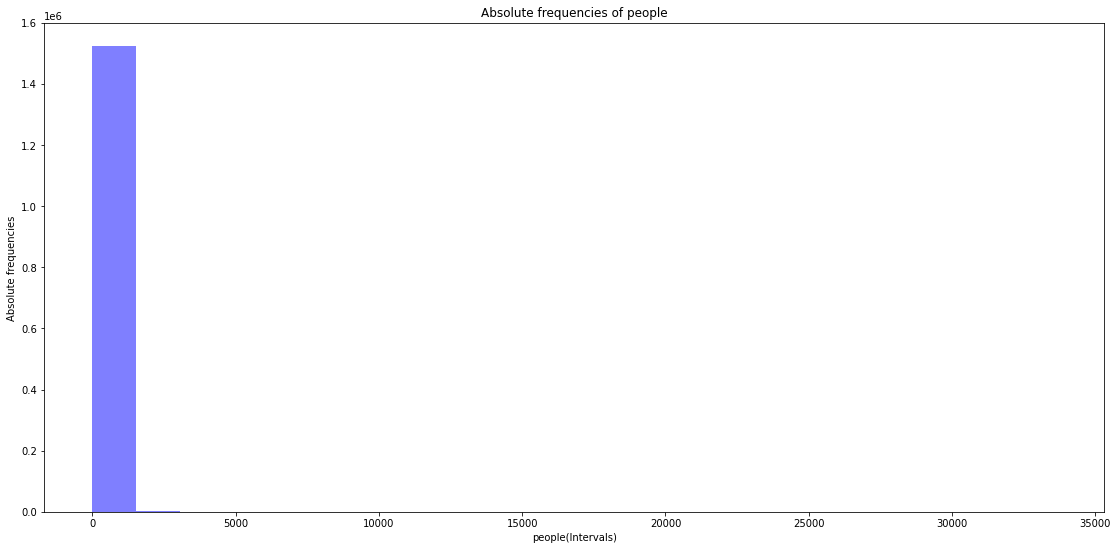

In [19]:
plt.figure(figsize = (19, 9))

length = len(res)
num_bins = round(1 + math.log2(length)) # Sturge rule
print(num_bins)

plt.hist(res, num_bins, facecolor='blue', alpha=0.5)

plt.title("Absolute frequencies of people") 
plt.xlabel("people(Intervals)")
plt.ylabel("Absolute frequencies") 
plt.show()

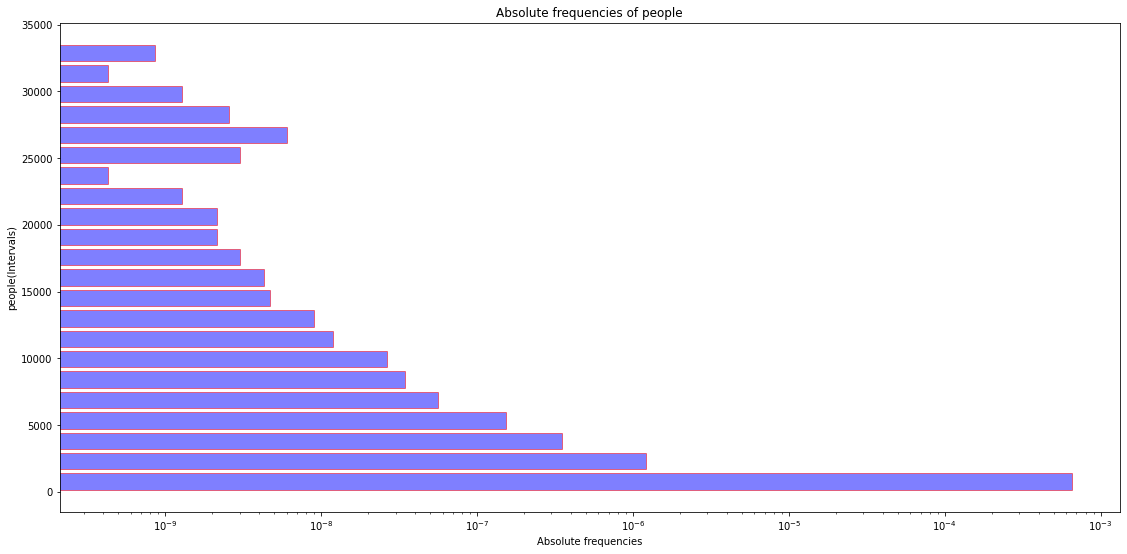

In [20]:
# we use log, to better visualize the plot

plt.figure(figsize = (19, 9))

length = len(res)
num_bins = round(1 + math.log2(length)) # Sturge rule
#print(num_bins)
plt.hist(res, num_bins, color = 'blue',
        edgecolor = 'red', density = True, 
        orientation = 'horizontal', rwidth = 0.8,
        alpha = .5, log = True)

plt.title("Absolute frequencies of people") 
plt.xlabel("Absolute frequencies")
plt.ylabel("people(Intervals)") 
plt.show()

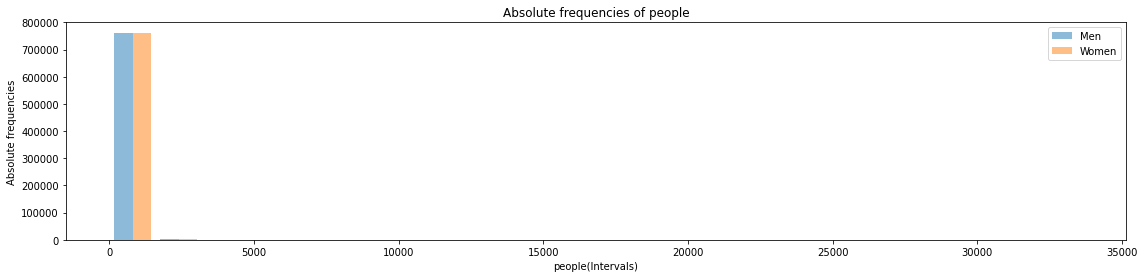

In [21]:
plt.figure(figsize = (19, 4))

length = len(res_men)
num_bins = round(1 + math.log2(length)) # Sturge rule
#print(num_bins)
plt.hist([res_men, res_women],
                num_bins, 
                label = ["Men", "Women"], alpha=0.5)
plt.legend()

plt.title("Absolute frequencies of people") 
plt.xlabel("people(Intervals)")
plt.ylabel("Absolute frequencies") ;

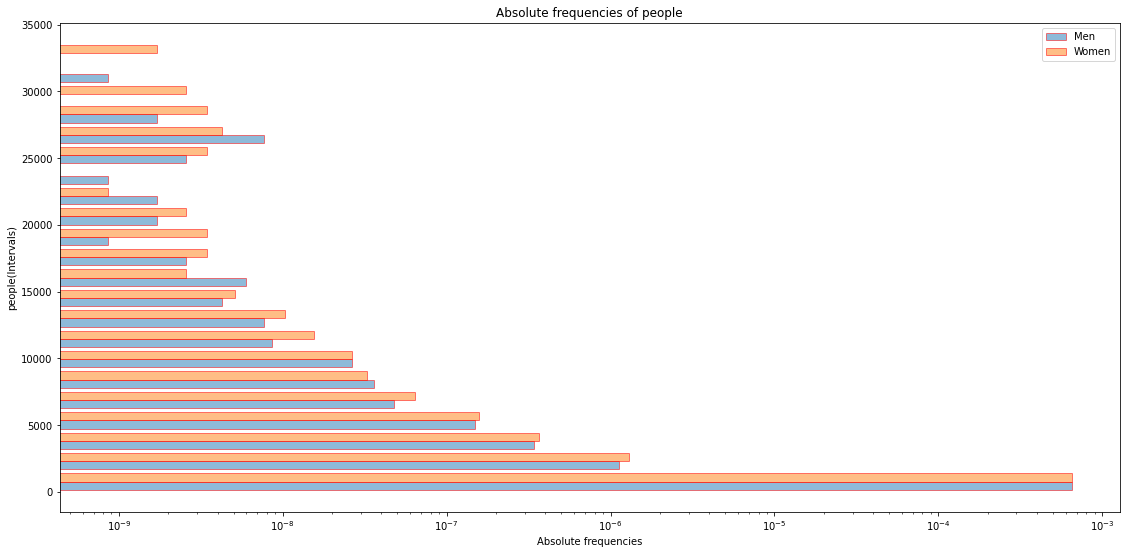

In [22]:
# we use log, to better visualize the plot
plt.figure(figsize = (19, 9))

length = len(res)
num_bins = round(1 + math.log2(length)) # Sturge rule
#print(num_bins)
plt.hist([res_men, res_women], num_bins, 
        edgecolor = 'red', density = True, 
        orientation = 'horizontal', rwidth = 0.8,
        alpha = .5, log = True, label = ["Men", "Women"])

plt.legend()

plt.title("Absolute frequencies of people") 
plt.xlabel("Absolute frequencies")
plt.ylabel("people(Intervals)") ;

# Percentage of people aged 15–24 years, for each municipality

In [23]:
res_comune = [] # total %pop aged 15-24 years, by comune
pop_comune = [] # total pop by comune
slice_comune = [] # total 15-24 by comune

for com in range(len(dic["Men"][0])):
    A = [dic["Men"][k][com] for k in range(len(dic["Age"]))]
    B = [dic["Women"][k][com] for k in range(len(dic["Age"]))]
    total_pop = sum(A+B)
    slice_A = A[3:5] # men 15-24
    slice_B = B[3:5] # women 15-24
    sliced = sum(slice_A)+sum(slice_B) # population age: 15-24
    if total_pop !=0:
        percent = (sliced/total_pop)*100
    else:
        percent = np.nan # we can remove the row or replace nan by neg value, 
                         # or ignore the commune when visualizing
    
    pop_comune.append(total_pop) # total pop by comune
    res_comune.append(percent) # total %pop aged 15-24 years, by comune
    slice_comune.append(sliced) # total 15-24 by comune
    
res_comune[:5]

[7.1315945996965295,
 7.692307692307692,
 nan,
 13.381461033884175,
 13.360207908485581]

In [24]:
max(res_comune)

57.14285714285714

In [25]:
pop_comune[:5]

[774.254876490623, 265.349794238683, 0, 14046.22813393976, 1663.687004322038]

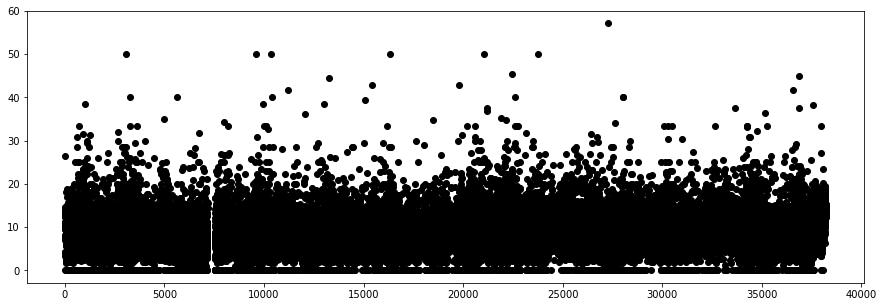

In [28]:
plt.figure(figsize = (15, 5))

plt.plot(range(len(res_comune)), res_comune, 'ko');

# Mean (avg) and Standard deviation (std)

In [29]:
avg_comune = [] # mean
std_comune = [] # std

for com in range(len(dic["Men"][0])):
    A = [dic["Men"][k][com] for k in range(len(dic["Age"]))]
    B = [dic["Women"][k][com] for k in range(len(dic["Age"]))]
    slice_A = A[3:5]
    slice_B = B[3:5]
    avg = np.mean(slice_A+slice_B)
    std = (np.var(slice_A+slice_B))**0.5 # or np.sqrt
    avg_comune.append(avg)
    std_comune.append(std)

    
avg_comune[:5]

[13.804179739923077,
 5.10288065843621,
 0.0,
 469.8976361184063,
 55.568010680969934]

In [30]:
std_comune[:5]

[10.842280030741296,
 8.838448565372042,
 0.0,
 59.67812403314221,
 17.257552391668536]

# Percentage of people aged 15-24 years in France

In [31]:
avg_France = np.mean(avg_comune)
avg_France

51.31404560309668

# Largest and lowest extreme % of population aged 15-24 years

In [32]:
max(res_comune), type(res_comune)

(57.14285714285714, list)

In [33]:
w = np.asarray(res_comune)[np.logical_not(np.isnan(res_comune))] # removing NaNs, not needed if we used 
                                                                # a larger value as 555
# with NaNs, we do not need to look at the results to fix the value (555 or more than)

In [34]:
v = np.unique(w)
v

array([ 0.        ,  0.68022294,  0.72781522, ..., 45.45454545,
       50.        , 57.14285714])

In [35]:
#to get ALL the min indices 
np.where(np.array(res_comune) == min(v))[0] # or np.flatnonzero(np.array(res_comune) == min(v))
#np.argmin only gives 1 elt

array([   18,    74,   158, ..., 37977, 38041, 38054])

In [36]:
max_val = np.unique(v)[-1] # 
# [-1] using NaN, 
#[-2] with a value : the last one is 555, which corresponds to municipalities with missing values
np.where(np.array(res_comune) == max_val)[0] # or np.flatnonzero(np.array(res_comune) == max_val)

array([27263])

In [37]:
extrem_bas = np.where(np.array(res_comune) == min(v))[0]
extrem_haut = np.where(np.array(res_comune) == max_val)[0]#[0]

In [38]:
extrem_haut

array([27263])

In [39]:
extrem_bas

array([   18,    74,   158, ..., 37977, 38041, 38054])

## Largest extreme %

In [40]:
print(" ==============  Largest extreme value  =============== ")
    
com = extrem_haut[0]
#leur nom, code insee, pourcentage 15/24, population

comune_name = sheet.col_slice(colx = 5, start_rowx=14+com, end_rowx=14+com+1)
comune_code_insee_DR = sheet.col_slice(colx = 1, start_rowx=14+com, end_rowx=14+com+1)
comune_code_insee_CR = sheet.col_slice(colx = 2, start_rowx=14+com, end_rowx=14+com+1)

comune_code_insee = comune_code_insee_DR[0].value + comune_code_insee_CR[0].value
print("---> Comune Name    :", comune_name[0].value, "\n")

print("---> Comune Code INSEE   :", comune_code_insee, "\n")

print("---> '%' of people aged 15-24 years by comune   :", round(res_comune[com], 2), " %", "\n")
# or res_comune[com]

print("--->  Comune Population 'all ages'   :", pop_comune[com], "\n")

print("--->  Comune Population, people aged 15-24 years   :", slice_comune[com], "\n")

print(" ==============  Largest extreme value  (END) =============== ")


 ==============  Largest extreme value  =============== 
---> Comune Name    : Roche-Charles-La-Mayrand 

---> Comune Code INSEE   : 63303 

---> '%' of people aged 15-24 years by comune   : 57.14  % 

--->  Comune Population 'all ages'   : 33.333333333333314 

--->  Comune Population, people aged 15-24 years   : 19.047619047619037 

 ==============  Largest extreme value  (END) =============== 


## Lowest extreme %

In [43]:
print(len(list(extrem_bas)))
list(extrem_bas)[:3]

2167


[18, 74, 158]

In [55]:
# we only print the 2 first and 2 last ones

print(" ==============  Lowest extreme value  =============== ")
    
for com in (list(extrem_bas)[:2] + list(extrem_bas)[-2:]) : #list(extrem_bas):
    comune_name = sheet.col_slice(colx = 5, start_rowx=14+com, end_rowx=14+com+1)
    comune_code_insee_DR = sheet.col_slice(colx = 1, start_rowx=14+com, end_rowx=14+com+1)
    comune_code_insee_CR = sheet.col_slice(colx = 2, start_rowx=14+com, end_rowx=14+com+1)

    comune_code_insee = comune_code_insee_DR[0].value + comune_code_insee_CR[0].value
    print("---> Comune Name    :", comune_name[0].value, "\n")

    print(5*" ", "---> Comune Code INSEE   :", comune_code_insee, "\n")

    print(5*" ", "---> '%' of people aged 15-24 years by comune   :", round(res_comune[com], 2), " %", "\n")
    # or res_comune[com]

    print(5*" ", "--->  Comune Population 'all ages'   :", pop_comune[com], "\n")

    print(5*" ", "--->  Comune Population, people aged 15-24 years   :", slice_comune[com], "\n")

print(" ==============  Lowest extreme value  (END) =============== ")


 ==============  Lowest extreme value  =============== 
---> Comune Name    : Armix 

      ---> Comune Code INSEE   : 01019 

      ---> '%' of people aged 15-24 years by comune   : 0.0  % 

      --->  Comune Population 'all ages'   : 40.83333333333331 

      --->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Chaley 

      ---> Comune Code INSEE   : 01076 

      ---> '%' of people aged 15-24 years by comune   : 0.0  % 

      --->  Comune Population 'all ages'   : 140.0 

      --->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Neuilly-En-Vexin 

      ---> Comune Code INSEE   : 95447 

      ---> '%' of people aged 15-24 years by comune   : 0.0  % 

      --->  Comune Population 'all ages'   : 208.0000000000001 

      --->  Comune Population, people aged 15-24 years   : 0 

---> Comune Name    : Plessis-Gassot 

      ---> Comune Code INSEE   : 95492 

      ---> '%' of people aged 15-24 years by comune   : 0.0  % 

      -

In [57]:
dict_1 = {}

for com in list(extrem_bas):
    comune_name = sheet.col_slice(colx = 5, start_rowx=14+com, end_rowx=14+com+1)
    comune_code_insee_DR = sheet.col_slice(colx = 1, start_rowx=14+com, end_rowx=14+com+1)
    comune_code_insee_CR = sheet.col_slice(colx = 2, start_rowx=14+com, end_rowx=14+com+1)
    comune_code_insee = comune_code_insee_DR[0].value + comune_code_insee_CR[0].value
  
    dict_1[comune_name[0].value] = {}
    
    dict_1[comune_name[0].value]["comune_code_insee"] = comune_code_insee
    dict_1[comune_name[0].value]["'%' of people aged 15-24 years"] = round(res_comune[com], 2)
    dict_1[comune_name[0].value]["Comune Population 'all ages'"] = pop_comune[com]
    dict_1[comune_name[0].value]["Comune Population, people aged 15-24 years"] = slice_comune[com]
    
len(dict_1)

2143

In [58]:
# we olny print the first element
list(dict_1.keys())[0]

'Armix'

In [62]:
list(dict_1.keys())[:2]

['Armix', 'Chaley']

In [63]:
dict_1[list(dict_1.keys())[0]]

{'comune_code_insee': '01019',
 "'%' of people aged 15-24 years": 0.0,
 "Comune Population 'all ages'": 40.83333333333331,
 'Comune Population, people aged 15-24 years': 0}

# Save data (res_comune & comunes_DR_CR)

In [64]:
comunes_labels_txt = sheet.col_slice(colx = 5, start_rowx=14, end_rowx=sheet.nrows-1)
comunes_labels = [i.value for i in list(comunes_labels_txt)]
len(comunes_labels)

38213

In [65]:
comunes_insee_DR = sheet.col_slice(colx = 1, start_rowx=14, end_rowx=sheet.nrows-1)
comunes_insee_CR = sheet.col_slice(colx = 2, start_rowx=14, end_rowx=sheet.nrows-1)
list_DR = list(comunes_insee_DR)
list_CR = list(comunes_insee_CR)
comunes_DR_CR = [i[0].value+i[1].value for i in list(zip(list_DR, list_CR))]
len(comunes_DR_CR)

38213

In [78]:
# save data using numpy (in our case)  or pickle ..
np.savez("comunes_data", (comunes_DR_CR,res_comune, pop_comune) )
#np.savez("comunes_labels", comunes_labels)

In [79]:
# END 